In [24]:
import numpy as np
import tensorflow as tf
import tensorflow
from tensorflow import keras
from keras import layers
from tensorflow.keras.utils import plot_model


# **Data Preprocessing**

First, we will normalize signal before taking average for creation of dataset

---
Then, EWT transform will be calculated and fed into the neural net.

---

Q1) Acc. to paper normalization of the data was done before EWT transform, What should be the sequence here?

---

Q2) What should be taken as the loss function

---
Q3) How should we go about making training data?


In [25]:
# Model Architecture

# 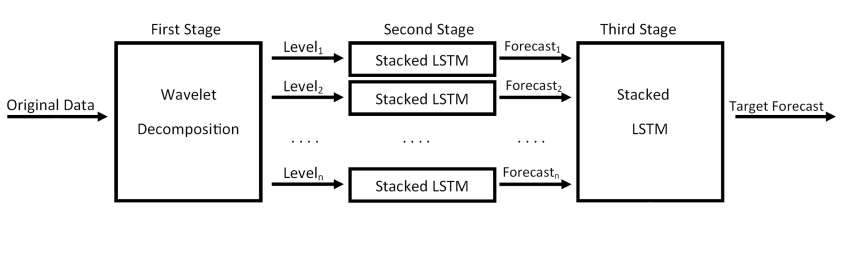

In [26]:
# Now assuming we have 10 levels of data of some signal length (ewt_signal_length for now)
# let us define the stacked LSTM will be used for all the 10 levels of Input Data each of length ewt_signal_length

In [27]:
# Stacked LSTM
# 2 layers of LSTM with memory units one of(32,16,8)
# 2nd layer of LSTM with half the memory units as of first
# 1 Dense layer


In [28]:
no_samples = 1000
ewt_signal_length = ewt_signal_length
n_levels = 10

In [29]:
def custom_layer1(tensor):
  return tensor[:,:,0]
def custom_layer2(tensor):
  return tensor[:,:,1]
def custom_layer3(tensor):
  return tensor[:,:,2]
def custom_layer4(tensor):
  return tensor[:,:,3]
def custom_layer5(tensor):
  return tensor[:,:,4]
def custom_layer6(tensor):
  return tensor[:,:,5]
def custom_layer7(tensor):
  return tensor[:,:,6]
def custom_layer8(tensor):
  return tensor[:,:,7]
def custom_layer9(tensor):
  return tensor[:,:,8]
def custom_layer10(tensor):
  return tensor[:,:,9]

In [30]:
no_samples = 1000
ewt_signal_length = ewt_signal_length
n_levels = 10
input = keras.Input(shape = (ewt_signal_length,n_levels))
input_data_model_1 = tensorflow.keras.layers.Lambda(custom_layer1, name="lambda_layer1")(input)
input_data_model_1 = layers.Reshape((1,ewt_signal_length))(input_data_model_1)
input_data_model_2 = tensorflow.keras.layers.Lambda(custom_layer2, name="lambda_layer2")(input)
input_data_model_2 = layers.Reshape((1,ewt_signal_length))(input_data_model_2)
input_data_model_3 = tensorflow.keras.layers.Lambda(custom_layer3, name="lambda_layer3")(input)
input_data_model_3 = layers.Reshape((1,ewt_signal_length))(input_data_model_3)
input_data_model_4 = tensorflow.keras.layers.Lambda(custom_layer4, name="lambda_layer4")(input)
input_data_model_4 = layers.Reshape((1,ewt_signal_length))(input_data_model_4)
input_data_model_5 = tensorflow.keras.layers.Lambda(custom_layer5, name="lambda_layer5")(input)
input_data_model_5 = layers.Reshape((1,ewt_signal_length))(input_data_model_5)
input_data_model_6 = tensorflow.keras.layers.Lambda(custom_layer6, name="lambda_layer6")(input)
input_data_model_6 = layers.Reshape((1,ewt_signal_length))(input_data_model_6)
input_data_model_7 = tensorflow.keras.layers.Lambda(custom_layer7, name="lambda_layer7")(input)
input_data_model_7 = layers.Reshape((1,ewt_signal_length))(input_data_model_7)
input_data_model_8 = tensorflow.keras.layers.Lambda(custom_layer8, name="lambda_layer8")(input)
input_data_model_8 = layers.Reshape((1,ewt_signal_length))(input_data_model_8)
input_data_model_9 = tensorflow.keras.layers.Lambda(custom_layer9, name="lambda_layer9")(input)
input_data_model_9 = layers.Reshape((1,ewt_signal_length))(input_data_model_9)
input_data_model_10 = tensorflow.keras.layers.Lambda(custom_layer10, name="lambda_layer10")(input)
input_data_model_10 = layers.Reshape((1,ewt_signal_length))(input_data_model_10)
for i in range(n_levels):
  globals()[f"x{i+1}"]= layers.LSTM(32,return_sequences = True)(globals()[f"input_data_model_{i+1}"])
  globals()[f"x{i+1}"] = layers.LSTM(16)(globals()[f"x{i+1}"])
  globals()[f"output_{i+1}"] = layers.Dense(1)(globals()[f"x{i+1}"])

outputs_models = layers.concatenate([output_1, output_2,output_3,output_4,output_5,output_6,output_7,output_8,output_9,output_10])
# final_output = layers.Dense(1)(outputs_models)
z = layers.Reshape((1,n_levels))(outputs_models)
z = layers.LSTM(32,return_sequences = True)(z)
z = layers.LSTM(16)(z)
final_output = layers.Dense(1)(z)
#z = layers.RNN(layers.LSTMCell(32),return_sequences = True)(outputs_models)
# z = layers.RNN(layers.LSTMCell(16))(z)
# final_output = layers.Dense(1)(z)
my_model = keras.Model(inputs = input,outputs = final_output,name = 'my model')


In [31]:
my_model.summary()

Model: "my model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 126, 10)]    0           []                               
                                                                                                  
 lambda_layer1 (Lambda)         (None, 126)          0           ['input_4[0][0]']                
                                                                                                  
 lambda_layer2 (Lambda)         (None, 126)          0           ['input_4[0][0]']                
                                                                                                  
 lambda_layer3 (Lambda)         (None, 126)          0           ['input_4[0][0]']                
                                                                                           

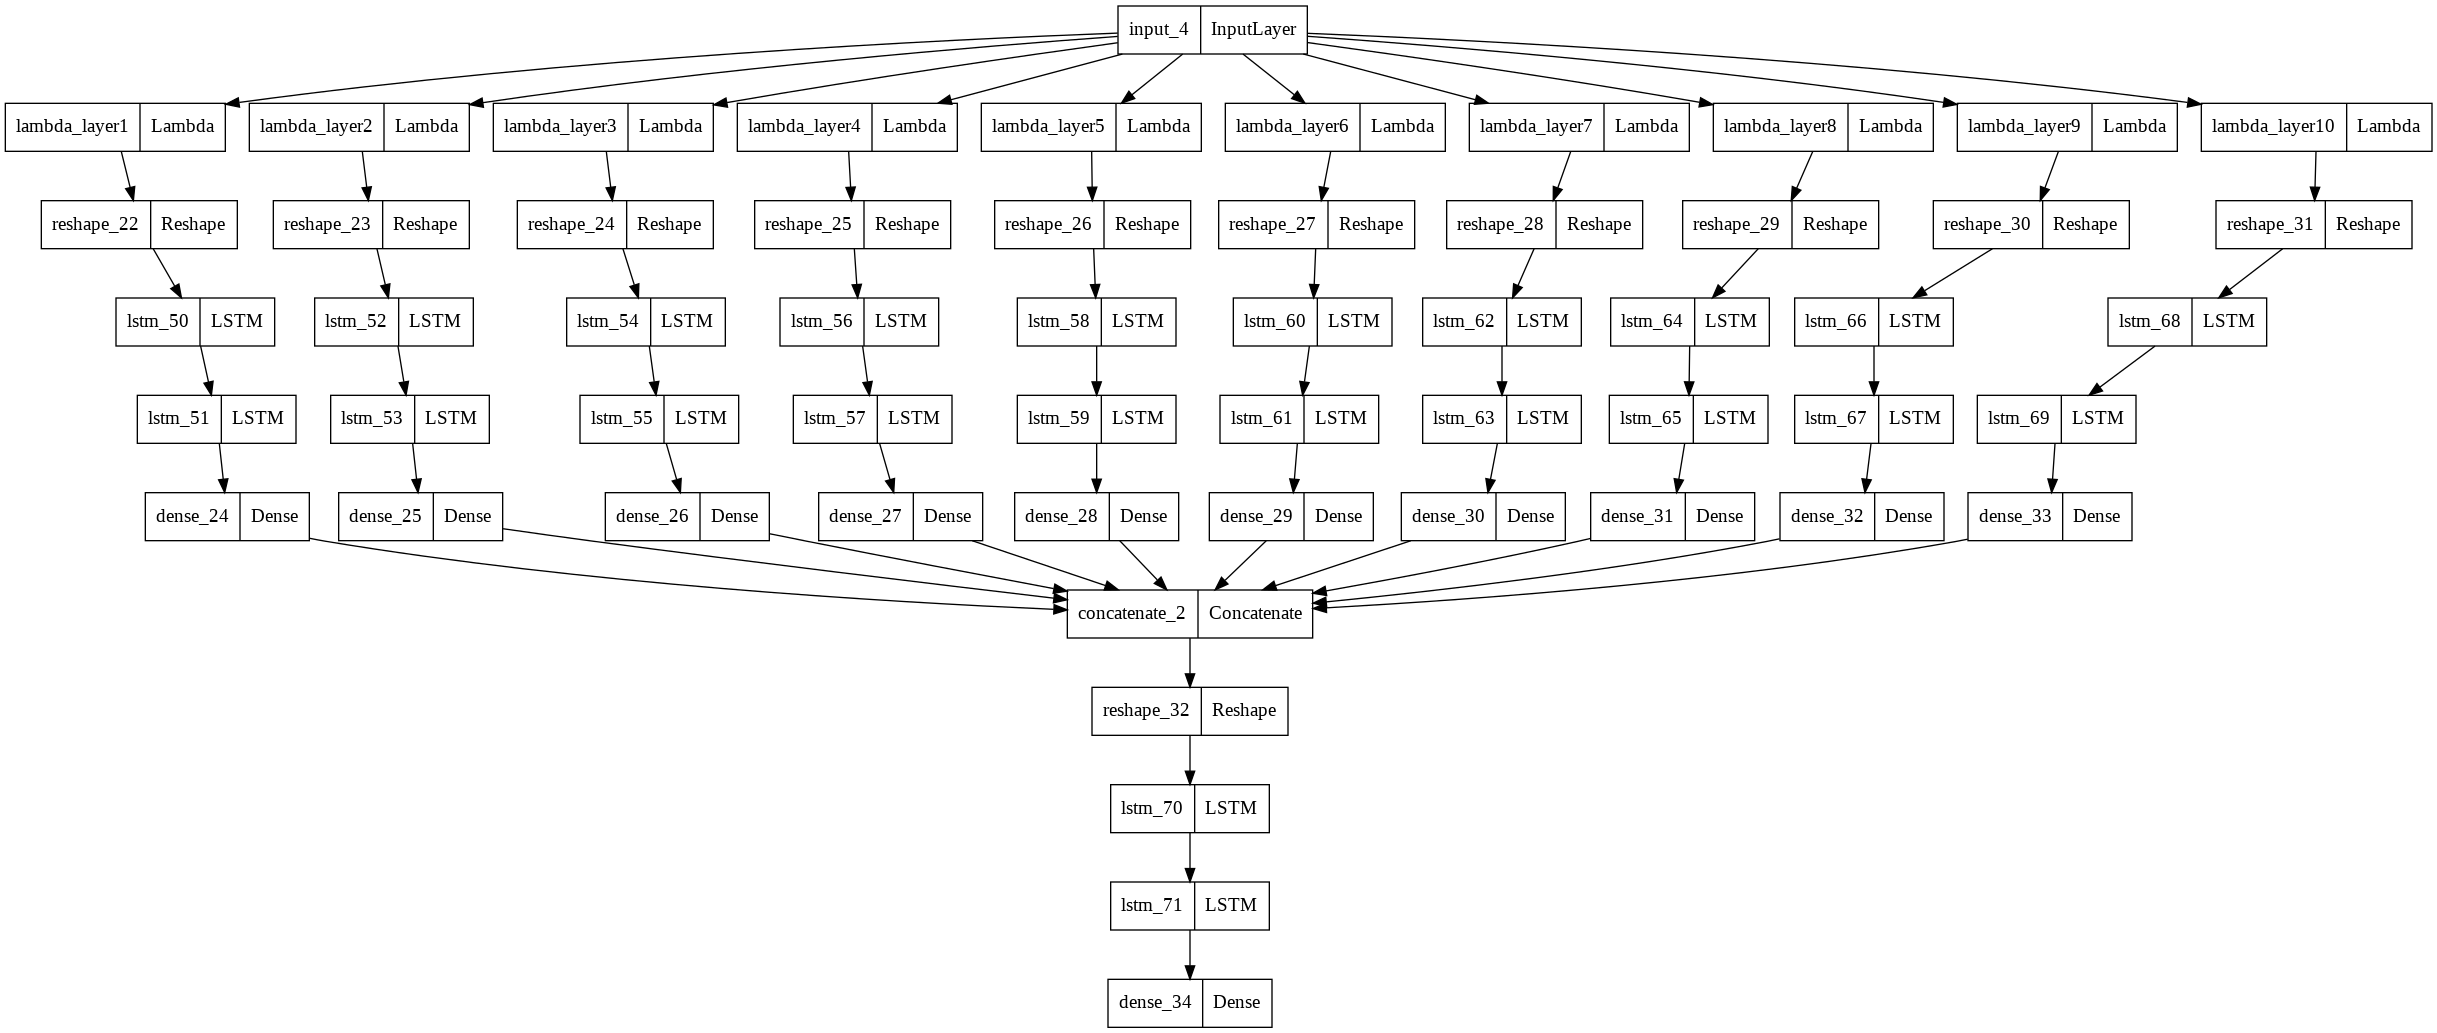

In [32]:
plot_model(my_model)